In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import os #システム操作系
import csv
from pathlib import Path #ファイル操作系
#from createdatas2 import createdata1, createdata2
import json
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


data_size = 100 #配列の大きさ
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
NOISE = 0

現在時刻： 2021-11-28 18:38:25.691275


In [4]:
# グラフの初期設定
plt.rcParams["figure.figsize"] = [3.14, 3.14] # 図の縦横のサイズ([横(inch),縦(inch)])
plt.rcParams["figure.dpi"] = 200 # dpi(dots per inch)
plt.rcParams["figure.facecolor"] = 'white' # 図の背景色
plt.rcParams["figure.edgecolor"] = 'black' # 枠線の色
plt.rcParams["font.family"] = "serif"       # 使用するフォント
plt.rcParams["font.serif"] = "Times New Roman"
plt.rcParams["font.size"] = 14              # 基本となるフォントの大きさ

plt.rcParams["xtick.direction"] = "in"      # 目盛り線の向き、内側"in"か外側"out"かその両方"inout"か
plt.rcParams["ytick.direction"] = "in"      # 目盛り線の向き、内側"in"か外側"out"かその両方"inout"か
plt.rcParams["xtick.bottom"] = True         # 下部に目盛り線を描くかどうか
plt.rcParams["ytick.left"] = True           # 左部に目盛り線を描くかどうか
plt.rcParams["xtick.major.size"] = 2.0      # x軸主目盛り線の長さ
plt.rcParams["ytick.major.size"] = 2.0      # y軸主目盛り線の長さ
plt.rcParams["xtick.major.width"] = 0.3     # x軸主目盛り線の線幅
plt.rcParams["ytick.major.width"] = 0.3     # y軸主目盛り線の線幅
plt.rcParams["xtick.minor.visible"] = False # x軸副目盛り線を描くかどうか
plt.rcParams["ytick.minor.visible"] = False # y軸副目盛り線を描くかどうか
plt.rcParams["xtick.minor.size"] = 2.0      # x軸副目盛り線の長さ
plt.rcParams["ytick.minor.size"] = 2.0      # y軸副目盛り線の長さ
plt.rcParams["xtick.minor.width"] = 0.3     # x軸副目盛り線の線幅
plt.rcParams["ytick.minor.width"] = 0.3     # y軸副目盛り線の線幅
plt.rcParams["xtick.labelsize"] = 8        # 目盛りのフォントサイズ
plt.rcParams["ytick.labelsize"] = 8        # 目盛りのフォントサイズ
plt.rcParams["xtick.major.pad"] = 3.0      # x軸から目盛までの距離
plt.rcParams["ytick.major.pad"] = 4.0      # y軸から目盛までの距離

plt.rcParams["axes.labelsize"] = 10         # 軸ラベルのフォントサイズ
plt.rcParams["axes.linewidth"] = 0.4        # グラフ囲う線の太さ
plt.rcParams["axes.grid"] = False           # グリッドを表示するかどうか

In [5]:
# このファイルの存在するフォルダの絶対パスを取得
dir_name = str(Path().resolve())
print('このファイルの存在するフォルダ：', dir_name)

# 保存先フォルダのパス作成
save_folder = os.path.join(dir_name, '210222')
print('保存フォルダ：', save_folder)

# 保存先フォルダの作成(既に存在する場合は無視される)
os.makedirs(save_folder, exist_ok=True)

このファイルの存在するフォルダ： /Users/nagaiyuma/Documents/myprogram
保存フォルダ： /Users/nagaiyuma/Documents/myprogram/210222


In [5]:
NOISE = 80
test_num = 100

x = np.zeros((test_num, data_size))
y = np.zeros((test_num, data_size))
t = np.zeros((test_num, 3))
ty = np.zeros((test_num, 3))
# ガウシアンビームのパラメータ
i0 = 1.0
x0 = 0.0
y0 = 0.0
w0 = 5.0
h0 = 0.0

hist_x =(N, data_size)

start = time.time()
for n in range(N):
    center = data_size/2
    # x配列とy配列
    x_array = np.arange(-center, center, 1.0)                         # x配列
    y_array = np.arange(-center, center, 1.0)                         # y配列
    nx = len(x_array)
    ny = len(y_array)
    intensity = np.zeros((nx, ny))                            # ノイズを含まない2次元強度分布
    x_grid, y_grid = np.meshgrid(x_array, y_array)
    intensity = i0 * np.exp(-2*((x_grid-x0)**2 + (y_grid-y0)**2)/w0**2).T

    # 最大強度を取る位置における強度プロファイル
    profile_x = np.zeros(nx)
    profile_y = np.zeros(ny)


    # 2次元の強度分布にノイズを付与
    noise = (np.random.rand(nx*ny)-0.5)*i0*NOISE*0.01   #プラスマイナスNOISE%のノイズ(一様分布), (np.random.rand(nx*ny)-0.5)*2の部分が-1から1までの乱数になる
    noise = noise.reshape((nx,ny))
    intensity_noise = intensity + noise

    # 最大値の探索 & その位置の強度プロファイルの取得
    idx = np.unravel_index(np.argmax(intensity_noise), intensity_noise.shape)
    profile_x= intensity_noise[:,idx[1]]
    profile_y = intensity_noise[idx[0],:]

    hist_x = profile_x - intensity[:,idx[1]]
    if n == N-1:
            elapsed_time = time.time() - start
            print ("経過時間:{0}".format(elapsed_time) + "[sec]")


経過時間:0.8206431865692139[sec]


In [29]:
file_num = 20 #テストファイル数20
test_num = 1000 #データ数
data_size = 100 #配列の大きさ
fit_param_x = np.zeros((file_num, test_num, 4))
fit_param_y = np.zeros((file_num, test_num, 4))
NOISE = 0
x = np.zeros((file_num, test_num, data_size))
y = np.zeros((file_num, test_num, data_size))
t = np.zeros((file_num ,test_num, 3))
ty = np.zeros((file_num ,test_num, 3))

createdata2(test_num, 0, data_size, x[1], y[1], t[1], ty[1], fit_param_x[1], fit_param_y[1])
createdata2(test_num, 30, data_size, x[2], y[2], t[2], ty[2], fit_param_x[1], fit_param_y[1])

経過時間:1.656198263168335[sec]
平均絶対誤差: 0.000000 ± 0.000000
経過時間:2.218813180923462[sec]
平均絶対誤差: 0.117818 ± 0.087948


(1000, array([[-0.01916505, -0.13671711, -0.13346528, ...,  0.12282739,
          0.07754737, -0.04322131],
        [-0.08333802,  0.06257366,  0.10622204, ..., -0.02204005,
          0.06901158,  0.14812814],
        [-0.01166392, -0.12353985,  0.06813179, ...,  0.14528324,
         -0.11493945,  0.12871472],
        ...,
        [-0.12748382, -0.08602252, -0.02672947, ..., -0.13977669,
         -0.03983864,  0.08644367],
        [ 0.06937539, -0.0194268 ,  0.12774014, ...,  0.04806143,
         -0.087019  ,  0.065774  ],
        [ 0.09680453,  0.10951975, -0.0594784 , ..., -0.0327114 ,
         -0.00909096, -0.07734626]]), array([[ 0.12369915, -0.11821956, -0.02068095, ..., -0.04917303,
         -0.05885533, -0.13925007],
        [-0.08347784, -0.07133992,  0.07063695, ..., -0.14363806,
          0.03966624,  0.02912483],
        [ 0.11142684,  0.0884053 , -0.08243659, ..., -0.01875111,
         -0.03900207,  0.13553314],
        ...,
        [-0.01584321,  0.05712998, -0.06348617, .

現在時刻： 2021-02-22 12:05:08.152379


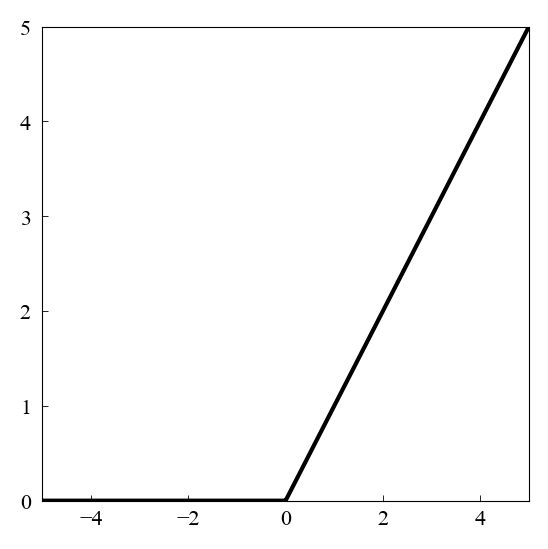

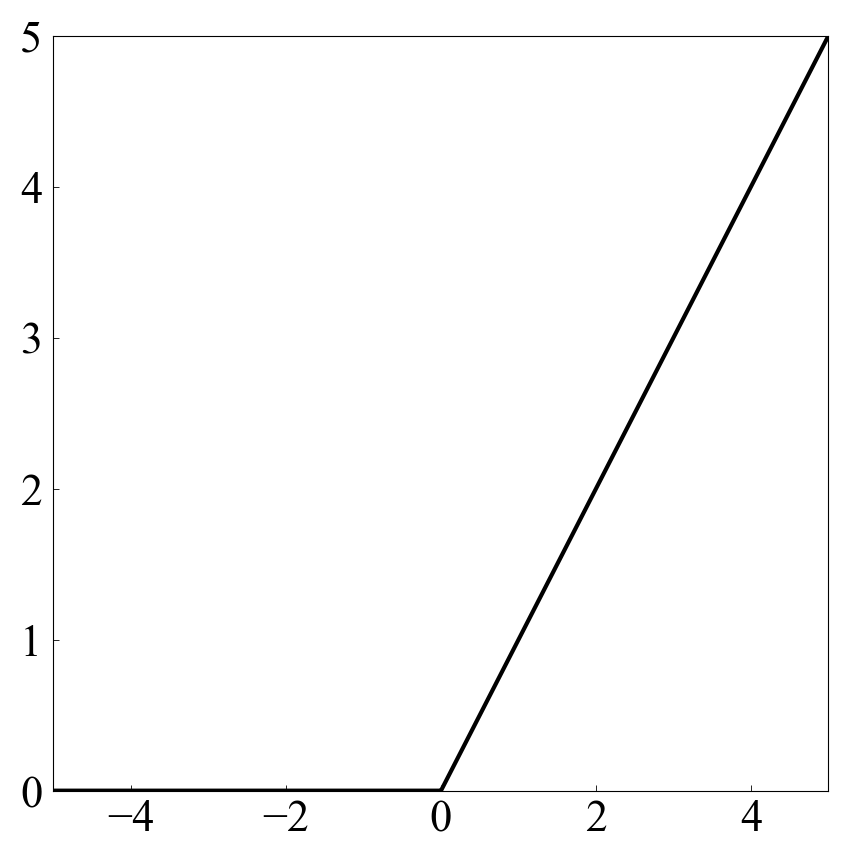

/Users/nagaiyuma/Documents/myprogram/210222/2021-02-22_12-05.pdf


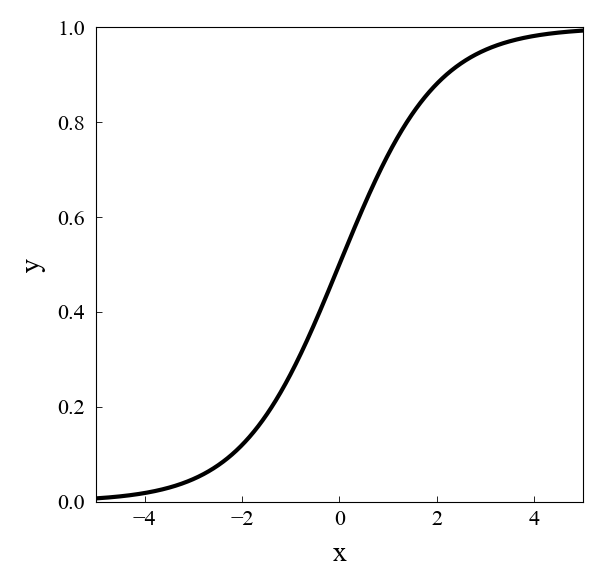

In [10]:
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
from scipy.optimize import curve_fit    # フィッティング用
#1Dガウシアンビームの関数の定義
def gaussian_beam(x,i0,x0,w0,h0):
    return  i0 * np.exp(-2*(x-x0)**2/w0**2) + h0

def sigmoid(x):
    return 1/(1+np.exp(-x))
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'.pdf'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
x = np.linspace(-5.0, 5.0, 1000)
y = np.zeros(len(x))
for i in range(len(x)):
    if x[i]>0:
        y[i]=x[i]
#表示
x_array = np.arange(-50, 50, 1.0)   
#plt.scatter(x_array, profile_x,  color="black", label = 'x0 = 0.0', s=1.0)
plt.plot(x, y, color="black")
#plt.xlabel('x')          # 軸ラベル
#plt.ylabel('y')
plt.xlim(-5.0, 5.0)      # x軸の表示範囲
plt.ylim(0.0, 5.0)      # x軸の表示範囲
plt.savefig(save_file)
plt.show()
plt.close()

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
#ax.set_xlabel("x [pixel]", fontsize=30)
#ax.set_ylabel("y[pixel]", fontsize=16)
ax.set_xlim(-5.0,5.0)
ax.set_ylim(0.0,5.0)
ax.plot(x, y, color="black")
plt.tick_params(labelsize=16)
#ax.tick_params(labelbottom=False,
#           labelright=False,
#           labelleft=False,
#           labeltop=False)
ax.grid(False)
fig.savefig(save_file, format="pdf", bbox_inches="tight")
plt.show()
print(save_file)


y = np.zeros(len(x))
for i in range(len(x)):
    y[i]=sigmoid(x[i])
#表示
x_array = np.arange(-50, 50, 1.0)   
#plt.scatter(x_array, profile_x,  color="black", label = 'x0 = 0.0', s=1.0)
plt.plot(x, y, color="black")
plt.xlabel('x')          # 軸ラベル
plt.ylabel('y')
plt.xlim(-5.0, 5.0)      # x軸の表示範囲
plt.ylim(0.0, 1.0)      # x軸の表示範囲
#plt.savefig(save_file)
plt.show()
plt.close()

In [26]:
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'.csv'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)
savedata = (x_array,x[1][0].flatten())
with open(save_file,'w') as f:
    writer = csv.writer(f)
    writer.writerows(savedata)

現在時刻： 2020-11-13 15:28:50.539329
保存ファイル名： 2020-11-13_15-28.csv
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/savefig0%/2020-11-13_15-28.csv


現在時刻： 2020-11-16 11:01:57.737576
保存ファイル名： 2020-11-16_11-01.svg
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/savefig30%/2020-11-16_11-01.svg


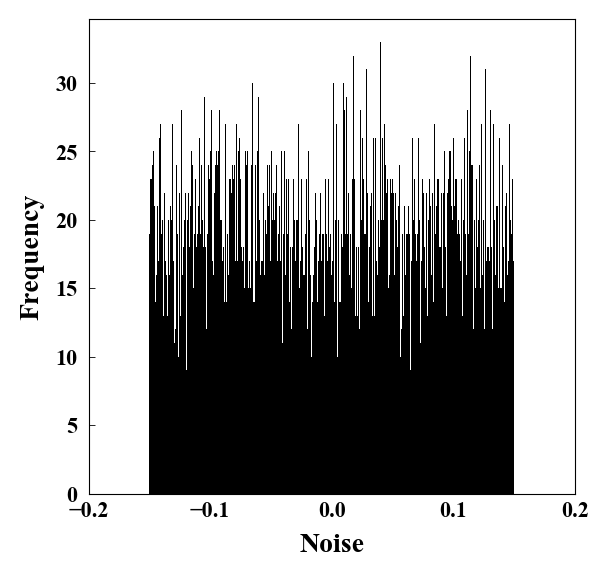

In [38]:
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
#損失関数とmaeの推移
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'.svg'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)
hist = noise.flatten()
# ヒストグラムのグラフを作成
plt.figure()
plt.hist(hist, bins=500, color='black')
plt.xlabel('Noise')
plt.ylabel('Frequency')
plt.xlim(-1.0, 1.0)
plt.savefig(save_file, format="svg", bbox_inches="tight")
plt.show()
plt.close()

In [4]:
NOISE = 80
# このファイルの存在するフォルダの絶対パスを取得
dir_name = str(Path().resolve())
print('このファイルの存在するフォルダ：', dir_name)

# 保存先フォルダのパス作成
save_folder = os.path.join(dir_name, f'savefig{NOISE}%')
print('保存フォルダ：', save_folder)

# 保存先フォルダの作成(既に存在する場合は無視される)
os.makedirs(save_folder, exist_ok=True)

このファイルの存在するフォルダ： /Users/nagaiyuma/Documents/myprogram
保存フォルダ： /Users/nagaiyuma/Documents/myprogram/savefig80%


このファイルの存在するフォルダ： /Users/nagaiyuma/Documents/myprogram
保存フォルダ： /Users/nagaiyuma/Documents/myprogram/201215
現在時刻： 2020-12-15 14:52:04.240075


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


保存ファイル名： 2020-12-15_14-52_80_loss.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/201215/2020-12-15_14-52_80_loss.png


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


保存ファイル名： 2020-12-15_14-52_80_mae.png
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/201215/2020-12-15_14-52_80_mae.png


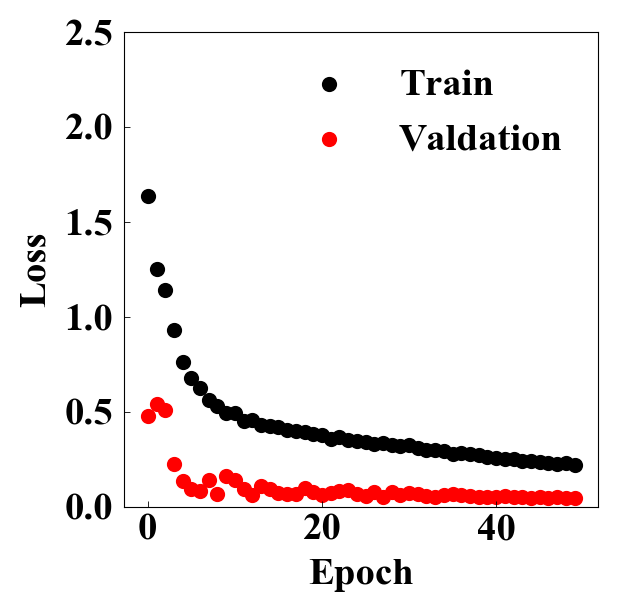

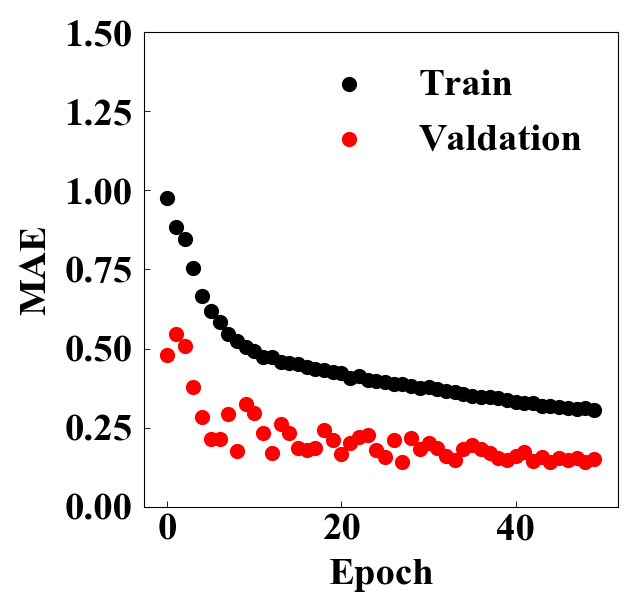

In [23]:
#過去の訓練データ読込
data_py_path = "/Users/nagaiyuma/Documents/myprogram/savefig80%/2020-11-13_23-38_noise80.json"
NOISE = 80
# このファイルの存在するフォルダの絶対パスを取得
dir_name = str(Path().resolve())
print('このファイルの存在するフォルダ：', dir_name)
# 保存先フォルダのパス作成
save_folder = os.path.join(dir_name, '201215')
print('保存フォルダ：', save_folder)
# 保存先フォルダの作成(既に存在する場合は無視される)
os.makedirs(save_folder, exist_ok=True)

dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
df = pd.read_json(data_py_path)
#
#df = pd.read_json(data_py_path + f'history{NOISE}_3.json')
df = df.sort_index()
df['epoch'] = np.arange(0, 50)
#df.plot.scatter(x = 'epoch',y = 'mae',  color="blue", label = f'{NOISE}%', ax = ax)


df['epoch'] = np.arange(0, 50)

#損失関数の推移
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_{NOISE}_loss.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成

fig = plt.figure()
ax = fig.add_subplot(111)
df.plot.scatter(x = 'epoch',y = 'loss',  color="black", label = 'Train', ax = ax)
df.plot.scatter(x = 'epoch',y = 'val_loss',  color="red", label = 'Valdation', ax = ax)
plt.legend(frameon=False)
ax.set_xlabel('Epoch',fontsize=14)          # 軸ラベル
ax.set_ylabel('Loss',fontsize=14)
ax.set_ylim(0, 2.5)      # y軸の表示範囲
plt.tick_params(labelsize=14)
ax.set_aspect(1./ax.get_data_ratio()) # グラフを正方形にする
fig.savefig(save_file, format="png", bbox_inches="tight")
fig.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

#maeの推移
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_{NOISE}_mae.png'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure()
ax = fig.add_subplot(111)
df.plot.scatter(x = 'epoch',y = 'mae',  color="black", label = 'Train', ax = ax)
df.plot.scatter(x = 'epoch',y = 'val_mae',  color="red", label = 'Valdation', ax = ax)
plt.legend(frameon=False)
ax.set_xlabel('Epoch',fontsize=14)          # 軸ラベル
ax.set_ylabel('MAE',fontsize=14)
ax.set_ylim(0, 1.5)      # y軸の表示範囲
plt.tick_params(labelsize=14)
ax.set_aspect(1./ax.get_data_ratio()) # グラフを正方形にする
fig.savefig(save_file, format="png", bbox_inches="tight")
fig.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

現在時刻： 2020-11-15 23:12:38.862081


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


保存ファイル名： 2020-11-15_23-12loss_set.svg
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/savefig0%/2020-11-15_23-12loss_set.svg


/Users/nagaiyuma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


保存ファイル名： 2020-11-15_23-12mae_set.svg
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/savefig0%/2020-11-15_23-12mae_set.svg


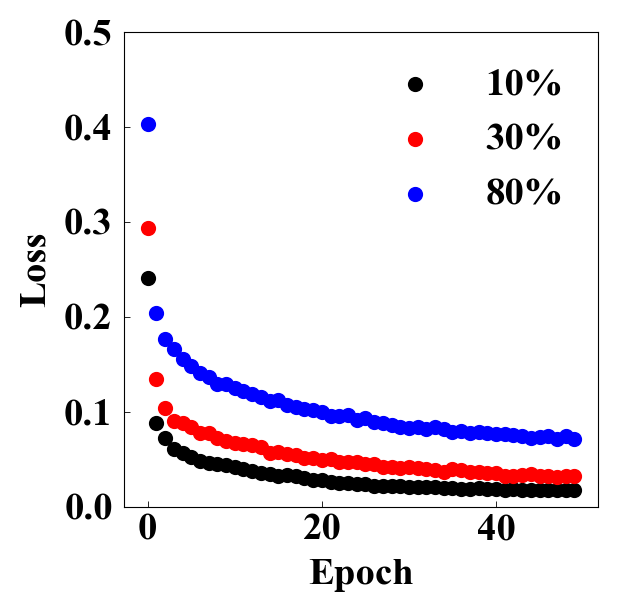

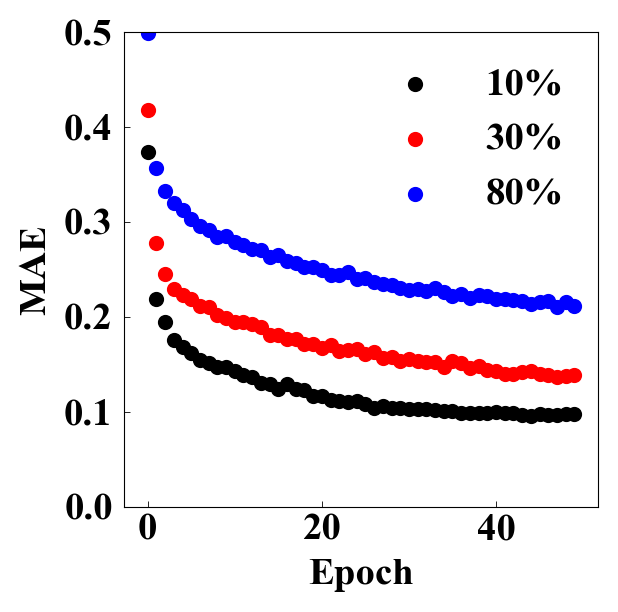

In [7]:
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)

#損失関数の推移
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'loss_set.svg'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成

fig = plt.figure()
ax = fig.add_subplot(111)
NOISE = 10
df = pd.read_json(data_py_path + f'history{NOISE}_1.json')
df = df.sort_index()
df['epoch'] = np.arange(0, 50)
df.plot.scatter(x = 'epoch',y = 'loss',  color="black", label = f'{NOISE}%', ax = ax)
NOISE = 30
df = pd.read_json(data_py_path + f'history{NOISE}_1.json')
df = df.sort_index()
df['epoch'] = np.arange(0, 50)
df.plot.scatter(x = 'epoch',y = 'loss',  color="red", label = f'{NOISE}%', ax = ax)
NOISE = 80
df = pd.read_json(data_py_path + f'history{NOISE}_1.json')
df = df.sort_index()
df['epoch'] = np.arange(0, 50)
df.plot.scatter(x = 'epoch',y = 'loss',  color="blue", label = f'{NOISE}%', ax = ax)

plt.legend(frameon=False)
ax.set_xlabel('Epoch', fontsize=14)          # 軸ラベル
ax.set_ylabel('Loss', fontsize=14)
ax.set_ylim(0, 0.5)      # y軸の表示範囲
plt.tick_params(labelsize=14)
ax.set_aspect(1./ax.get_data_ratio()) # グラフを正方形にする
fig.savefig(save_file, format="svg", bbox_inches="tight")
fig.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

#maeの推移
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +'mae_set.svg'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成
fig = plt.figure()
ax = fig.add_subplot(111)
NOISE = 10
df = pd.read_json(data_py_path + f'history{NOISE}_1.json')
df = df.sort_index()
df['epoch'] = np.arange(0, 50)
df.plot.scatter(x = 'epoch',y = 'mae',  color="black", label = f'{NOISE}%' ,ax = ax)
NOISE = 30
df = pd.read_json(data_py_path + f'history{NOISE}_1.json')
df = df.sort_index()
df['epoch'] = np.arange(0, 50)
df.plot.scatter(x = 'epoch',y = 'mae',  color="red", label = f'{NOISE}%', ax = ax)
NOISE = 80
df = pd.read_json(data_py_path + f'history{NOISE}_1.json')
df = df.sort_index()
df['epoch'] = np.arange(0, 50)
df.plot.scatter(x = 'epoch',y = 'mae',  color="blue", label = f'{NOISE}%', ax = ax)


plt.legend(frameon=False)
ax.set_xlabel('Epoch', fontsize=14)          # 軸ラベル
ax.set_ylabel('MAE', fontsize=14)
ax.set_ylim(0, 0.5)      # y軸の表示範囲
plt.tick_params(labelsize=14)
ax.set_aspect(1./ax.get_data_ratio()) # グラフを正方形にする
fig.savefig(save_file, format="svg", bbox_inches="tight")
fig.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)

In [5]:
#表示データ抽出
size = 100
exp = experiments[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
las = laser[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
x_array = np.arange(idx[0]-size, idx[0]+size, 1.0)                         # x配列
y_array = np.arange(idx[1]-size, idx[1]+size, 1.0)                         # y配列
x_grid, y_grid = np.meshgrid(x_array, y_array)
#長さ取得
nx = len(x_array)
ny = len(y_array)
#2D楕円ガウシアンビームの関数の定義
def gaussian_beam_xy(X,i0,b0,x0,y0,wx,wy,h0):
    x,y = X
    return  (i0*np.exp((-2/(1-b0**2))*(((x-x0)/wx)**2+((y-y0)/wy)**2-2*b0*((x-x0)/wx)*((y-y0)/wy)))+ h0).flatten()

#初期パラメータ
i0 = 1.0
b0 = 0.5
x0 = idx[0]
y0 = idx[1]
wx = 50.0
wy = 50.0
h0 = 0.0
param_ini = np.array([i0, b0, x0, y0, wx, wy, h0])
parameters = np.zeros((50, len(param)))

for i in range(50):    
    exp_i = exp[i].flatten()
    param, cov  = curve_fit(gaussian_beam_xy, (x_grid.T, y_grid.T), exp_i, p0=param_ini, maxfev=2000)
    parameters[i] = param
#結果の表示
ave_param = np.average(parameters, axis=0)
std_param = np.std(parameters, axis=0)

print(f'i0 = {ave_param[0]}±{std_param[0]}')
print(f'b0 = {ave_param[1]}±{std_param[1]}')
print(f'x0 = {ave_param[2]}±{std_param[2]}')
print(f'y0 = {ave_param[3]}±{std_param[3]}')
print(f'wx = {ave_param[4]}±{std_param[4]}')
print(f'wy = {ave_param[5]}±{std_param[5]}')
print(f'h0 = {ave_param[6]}±{std_param[6]}')

NameError: name 'idx' is not defined

In [5]:
#表示データ抽出
size = 100
exp = experiments[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
las = laser[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
x_array = np.arange(idx[0]-size, idx[0]+size, 1.0)                         # x配列
y_array = np.arange(idx[1]-size, idx[1]+size, 1.0)                         # y配列
x_grid, y_grid = np.meshgrid(x_array, y_array)
#長さ取得
nx = len(x_array)
ny = len(y_array)
#2D楕円ガウシアンビームの関数の定義
def gaussian_beam_xy(X,i0,b0,x0,y0,wx,wy,h0):
    x,y = X
    return  (i0*np.exp((-2/(1-b0**2))*(((x-x0)/wx)**2+((y-y0)/wy)**2-2*b0*((x-x0)/wx)*((y-y0)/wy)))+ h0).flatten()

#初期パラメータ
i0 = 1.0
b0 = 0.5
x0 = idx[0]
y0 = idx[1]
wx = 50.0
wy = 50.0
h0 = 0.0
param_ini = np.array([i0, b0, x0, y0, wx, wy, h0])
parameters = np.zeros((50, len(param)))

for i in range(50):    
    exp_i = exp[i].flatten()
    param, cov  = curve_fit(gaussian_beam_xy, (x_grid.T, y_grid.T), exp_i, p0=param_ini, maxfev=2000)
    parameters[i] = param
#結果の表示
ave_param = np.average(parameters, axis=0)
std_param = np.std(parameters, axis=0)

print(f'i0 = {ave_param[0]}±{std_param[0]}')
print(f'b0 = {ave_param[1]}±{std_param[1]}')
print(f'x0 = {ave_param[2]}±{std_param[2]}')
print(f'y0 = {ave_param[3]}±{std_param[3]}')
print(f'wx = {ave_param[4]}±{std_param[4]}')
print(f'wy = {ave_param[5]}±{std_param[5]}')
print(f'h0 = {ave_param[6]}±{std_param[6]}')

NameError: name 'idx' is not defined

In [5]:
#表示データ抽出
size = 100
exp = experiments[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
las = laser[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
x_array = np.arange(idx[0]-size, idx[0]+size, 1.0)                         # x配列
y_array = np.arange(idx[1]-size, idx[1]+size, 1.0)                         # y配列
x_grid, y_grid = np.meshgrid(x_array, y_array)
#長さ取得
nx = len(x_array)
ny = len(y_array)
#2D楕円ガウシアンビームの関数の定義
def gaussian_beam_xy(X,i0,b0,x0,y0,wx,wy,h0):
    x,y = X
    return  (i0*np.exp((-2/(1-b0**2))*(((x-x0)/wx)**2+((y-y0)/wy)**2-2*b0*((x-x0)/wx)*((y-y0)/wy)))+ h0).flatten()

#初期パラメータ
i0 = 1.0
b0 = 0.5
x0 = idx[0]
y0 = idx[1]
wx = 50.0
wy = 50.0
h0 = 0.0
param_ini = np.array([i0, b0, x0, y0, wx, wy, h0])
parameters = np.zeros((50, len(param)))

for i in range(50):    
    exp_i = exp[i].flatten()
    param, cov  = curve_fit(gaussian_beam_xy, (x_grid.T, y_grid.T), exp_i, p0=param_ini, maxfev=2000)
    parameters[i] = param
#結果の表示
ave_param = np.average(parameters, axis=0)
std_param = np.std(parameters, axis=0)

print(f'i0 = {ave_param[0]}±{std_param[0]}')
print(f'b0 = {ave_param[1]}±{std_param[1]}')
print(f'x0 = {ave_param[2]}±{std_param[2]}')
print(f'y0 = {ave_param[3]}±{std_param[3]}')
print(f'wx = {ave_param[4]}±{std_param[4]}')
print(f'wy = {ave_param[5]}±{std_param[5]}')
print(f'h0 = {ave_param[6]}±{std_param[6]}')

NameError: name 'idx' is not defined

In [5]:
#表示データ抽出
size = 100
exp = experiments[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
las = laser[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
x_array = np.arange(idx[0]-size, idx[0]+size, 1.0)                         # x配列
y_array = np.arange(idx[1]-size, idx[1]+size, 1.0)                         # y配列
x_grid, y_grid = np.meshgrid(x_array, y_array)
#長さ取得
nx = len(x_array)
ny = len(y_array)
#2D楕円ガウシアンビームの関数の定義
def gaussian_beam_xy(X,i0,b0,x0,y0,wx,wy,h0):
    x,y = X
    return  (i0*np.exp((-2/(1-b0**2))*(((x-x0)/wx)**2+((y-y0)/wy)**2-2*b0*((x-x0)/wx)*((y-y0)/wy)))+ h0).flatten()

#初期パラメータ
i0 = 1.0
b0 = 0.5
x0 = idx[0]
y0 = idx[1]
wx = 50.0
wy = 50.0
h0 = 0.0
param_ini = np.array([i0, b0, x0, y0, wx, wy, h0])
parameters = np.zeros((50, len(param)))

for i in range(50):    
    exp_i = exp[i].flatten()
    param, cov  = curve_fit(gaussian_beam_xy, (x_grid.T, y_grid.T), exp_i, p0=param_ini, maxfev=2000)
    parameters[i] = param
#結果の表示
ave_param = np.average(parameters, axis=0)
std_param = np.std(parameters, axis=0)

print(f'i0 = {ave_param[0]}±{std_param[0]}')
print(f'b0 = {ave_param[1]}±{std_param[1]}')
print(f'x0 = {ave_param[2]}±{std_param[2]}')
print(f'y0 = {ave_param[3]}±{std_param[3]}')
print(f'wx = {ave_param[4]}±{std_param[4]}')
print(f'wy = {ave_param[5]}±{std_param[5]}')
print(f'h0 = {ave_param[6]}±{std_param[6]}')

NameError: name 'idx' is not defined

In [5]:
#表示データ抽出
size = 100
exp = experiments[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
las = laser[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
x_array = np.arange(idx[0]-size, idx[0]+size, 1.0)                         # x配列
y_array = np.arange(idx[1]-size, idx[1]+size, 1.0)                         # y配列
x_grid, y_grid = np.meshgrid(x_array, y_array)
#長さ取得
nx = len(x_array)
ny = len(y_array)
#2D楕円ガウシアンビームの関数の定義
def gaussian_beam_xy(X,i0,b0,x0,y0,wx,wy,h0):
    x,y = X
    return  (i0*np.exp((-2/(1-b0**2))*(((x-x0)/wx)**2+((y-y0)/wy)**2-2*b0*((x-x0)/wx)*((y-y0)/wy)))+ h0).flatten()

#初期パラメータ
i0 = 1.0
b0 = 0.5
x0 = idx[0]
y0 = idx[1]
wx = 50.0
wy = 50.0
h0 = 0.0
param_ini = np.array([i0, b0, x0, y0, wx, wy, h0])
parameters = np.zeros((50, len(param)))

for i in range(50):    
    exp_i = exp[i].flatten()
    param, cov  = curve_fit(gaussian_beam_xy, (x_grid.T, y_grid.T), exp_i, p0=param_ini, maxfev=2000)
    parameters[i] = param
#結果の表示
ave_param = np.average(parameters, axis=0)
std_param = np.std(parameters, axis=0)

print(f'i0 = {ave_param[0]}±{std_param[0]}')
print(f'b0 = {ave_param[1]}±{std_param[1]}')
print(f'x0 = {ave_param[2]}±{std_param[2]}')
print(f'y0 = {ave_param[3]}±{std_param[3]}')
print(f'wx = {ave_param[4]}±{std_param[4]}')
print(f'wy = {ave_param[5]}±{std_param[5]}')
print(f'h0 = {ave_param[6]}±{std_param[6]}')

NameError: name 'idx' is not defined

In [5]:
#表示データ抽出
size = 100
exp = experiments[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
las = laser[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
x_array = np.arange(idx[0]-size, idx[0]+size, 1.0)                         # x配列
y_array = np.arange(idx[1]-size, idx[1]+size, 1.0)                         # y配列
x_grid, y_grid = np.meshgrid(x_array, y_array)
#長さ取得
nx = len(x_array)
ny = len(y_array)
#2D楕円ガウシアンビームの関数の定義
def gaussian_beam_xy(X,i0,b0,x0,y0,wx,wy,h0):
    x,y = X
    return  (i0*np.exp((-2/(1-b0**2))*(((x-x0)/wx)**2+((y-y0)/wy)**2-2*b0*((x-x0)/wx)*((y-y0)/wy)))+ h0).flatten()

#初期パラメータ
i0 = 1.0
b0 = 0.5
x0 = idx[0]
y0 = idx[1]
wx = 50.0
wy = 50.0
h0 = 0.0
param_ini = np.array([i0, b0, x0, y0, wx, wy, h0])
parameters = np.zeros((50, len(param)))

for i in range(50):    
    exp_i = exp[i].flatten()
    param, cov  = curve_fit(gaussian_beam_xy, (x_grid.T, y_grid.T), exp_i, p0=param_ini, maxfev=2000)
    parameters[i] = param
#結果の表示
ave_param = np.average(parameters, axis=0)
std_param = np.std(parameters, axis=0)

print(f'i0 = {ave_param[0]}±{std_param[0]}')
print(f'b0 = {ave_param[1]}±{std_param[1]}')
print(f'x0 = {ave_param[2]}±{std_param[2]}')
print(f'y0 = {ave_param[3]}±{std_param[3]}')
print(f'wx = {ave_param[4]}±{std_param[4]}')
print(f'wy = {ave_param[5]}±{std_param[5]}')
print(f'h0 = {ave_param[6]}±{std_param[6]}')

NameError: name 'idx' is not defined

In [5]:
#表示データ抽出
size = 100
exp = experiments[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
las = laser[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
x_array = np.arange(idx[0]-size, idx[0]+size, 1.0)                         # x配列
y_array = np.arange(idx[1]-size, idx[1]+size, 1.0)                         # y配列
x_grid, y_grid = np.meshgrid(x_array, y_array)
#長さ取得
nx = len(x_array)
ny = len(y_array)
#2D楕円ガウシアンビームの関数の定義
def gaussian_beam_xy(X,i0,b0,x0,y0,wx,wy,h0):
    x,y = X
    return  (i0*np.exp((-2/(1-b0**2))*(((x-x0)/wx)**2+((y-y0)/wy)**2-2*b0*((x-x0)/wx)*((y-y0)/wy)))+ h0).flatten()

#初期パラメータ
i0 = 1.0
b0 = 0.5
x0 = idx[0]
y0 = idx[1]
wx = 50.0
wy = 50.0
h0 = 0.0
param_ini = np.array([i0, b0, x0, y0, wx, wy, h0])
parameters = np.zeros((50, len(param)))

for i in range(50):    
    exp_i = exp[i].flatten()
    param, cov  = curve_fit(gaussian_beam_xy, (x_grid.T, y_grid.T), exp_i, p0=param_ini, maxfev=2000)
    parameters[i] = param
#結果の表示
ave_param = np.average(parameters, axis=0)
std_param = np.std(parameters, axis=0)

print(f'i0 = {ave_param[0]}±{std_param[0]}')
print(f'b0 = {ave_param[1]}±{std_param[1]}')
print(f'x0 = {ave_param[2]}±{std_param[2]}')
print(f'y0 = {ave_param[3]}±{std_param[3]}')
print(f'wx = {ave_param[4]}±{std_param[4]}')
print(f'wy = {ave_param[5]}±{std_param[5]}')
print(f'h0 = {ave_param[6]}±{std_param[6]}')

NameError: name 'idx' is not defined

In [5]:
#表示データ抽出
size = 100
exp = experiments[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
las = laser[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
x_array = np.arange(idx[0]-size, idx[0]+size, 1.0)                         # x配列
y_array = np.arange(idx[1]-size, idx[1]+size, 1.0)                         # y配列
x_grid, y_grid = np.meshgrid(x_array, y_array)
#長さ取得
nx = len(x_array)
ny = len(y_array)
#2D楕円ガウシアンビームの関数の定義
def gaussian_beam_xy(X,i0,b0,x0,y0,wx,wy,h0):
    x,y = X
    return  (i0*np.exp((-2/(1-b0**2))*(((x-x0)/wx)**2+((y-y0)/wy)**2-2*b0*((x-x0)/wx)*((y-y0)/wy)))+ h0).flatten()

#初期パラメータ
i0 = 1.0
b0 = 0.5
x0 = idx[0]
y0 = idx[1]
wx = 50.0
wy = 50.0
h0 = 0.0
param_ini = np.array([i0, b0, x0, y0, wx, wy, h0])
parameters = np.zeros((50, len(param)))

for i in range(50):    
    exp_i = exp[i].flatten()
    param, cov  = curve_fit(gaussian_beam_xy, (x_grid.T, y_grid.T), exp_i, p0=param_ini, maxfev=2000)
    parameters[i] = param
#結果の表示
ave_param = np.average(parameters, axis=0)
std_param = np.std(parameters, axis=0)

print(f'i0 = {ave_param[0]}±{std_param[0]}')
print(f'b0 = {ave_param[1]}±{std_param[1]}')
print(f'x0 = {ave_param[2]}±{std_param[2]}')
print(f'y0 = {ave_param[3]}±{std_param[3]}')
print(f'wx = {ave_param[4]}±{std_param[4]}')
print(f'wy = {ave_param[5]}±{std_param[5]}')
print(f'h0 = {ave_param[6]}±{std_param[6]}')

NameError: name 'idx' is not defined

In [5]:
#表示データ抽出
size = 100
exp = experiments[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
las = laser[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
x_array = np.arange(idx[0]-size, idx[0]+size, 1.0)                         # x配列
y_array = np.arange(idx[1]-size, idx[1]+size, 1.0)                         # y配列
x_grid, y_grid = np.meshgrid(x_array, y_array)
#長さ取得
nx = len(x_array)
ny = len(y_array)
#2D楕円ガウシアンビームの関数の定義
def gaussian_beam_xy(X,i0,b0,x0,y0,wx,wy,h0):
    x,y = X
    return  (i0*np.exp((-2/(1-b0**2))*(((x-x0)/wx)**2+((y-y0)/wy)**2-2*b0*((x-x0)/wx)*((y-y0)/wy)))+ h0).flatten()

#初期パラメータ
i0 = 1.0
b0 = 0.5
x0 = idx[0]
y0 = idx[1]
wx = 50.0
wy = 50.0
h0 = 0.0
param_ini = np.array([i0, b0, x0, y0, wx, wy, h0])
parameters = np.zeros((50, len(param)))

for i in range(50):    
    exp_i = exp[i].flatten()
    param, cov  = curve_fit(gaussian_beam_xy, (x_grid.T, y_grid.T), exp_i, p0=param_ini, maxfev=2000)
    parameters[i] = param
#結果の表示
ave_param = np.average(parameters, axis=0)
std_param = np.std(parameters, axis=0)

print(f'i0 = {ave_param[0]}±{std_param[0]}')
print(f'b0 = {ave_param[1]}±{std_param[1]}')
print(f'x0 = {ave_param[2]}±{std_param[2]}')
print(f'y0 = {ave_param[3]}±{std_param[3]}')
print(f'wx = {ave_param[4]}±{std_param[4]}')
print(f'wy = {ave_param[5]}±{std_param[5]}')
print(f'h0 = {ave_param[6]}±{std_param[6]}')

NameError: name 'idx' is not defined

In [5]:
#表示データ抽出
size = 100
exp = experiments[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
las = laser[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
x_array = np.arange(idx[0]-size, idx[0]+size, 1.0)                         # x配列
y_array = np.arange(idx[1]-size, idx[1]+size, 1.0)                         # y配列
x_grid, y_grid = np.meshgrid(x_array, y_array)
#長さ取得
nx = len(x_array)
ny = len(y_array)
#2D楕円ガウシアンビームの関数の定義
def gaussian_beam_xy(X,i0,b0,x0,y0,wx,wy,h0):
    x,y = X
    return  (i0*np.exp((-2/(1-b0**2))*(((x-x0)/wx)**2+((y-y0)/wy)**2-2*b0*((x-x0)/wx)*((y-y0)/wy)))+ h0).flatten()

#初期パラメータ
i0 = 1.0
b0 = 0.5
x0 = idx[0]
y0 = idx[1]
wx = 50.0
wy = 50.0
h0 = 0.0
param_ini = np.array([i0, b0, x0, y0, wx, wy, h0])
parameters = np.zeros((50, len(param)))

for i in range(50):    
    exp_i = exp[i].flatten()
    param, cov  = curve_fit(gaussian_beam_xy, (x_grid.T, y_grid.T), exp_i, p0=param_ini, maxfev=2000)
    parameters[i] = param
#結果の表示
ave_param = np.average(parameters, axis=0)
std_param = np.std(parameters, axis=0)

print(f'i0 = {ave_param[0]}±{std_param[0]}')
print(f'b0 = {ave_param[1]}±{std_param[1]}')
print(f'x0 = {ave_param[2]}±{std_param[2]}')
print(f'y0 = {ave_param[3]}±{std_param[3]}')
print(f'wx = {ave_param[4]}±{std_param[4]}')
print(f'wy = {ave_param[5]}±{std_param[5]}')
print(f'h0 = {ave_param[6]}±{std_param[6]}')

NameError: name 'idx' is not defined

In [5]:
#表示データ抽出
size = 100
exp = experiments[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
las = laser[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
x_array = np.arange(idx[0]-size, idx[0]+size, 1.0)                         # x配列
y_array = np.arange(idx[1]-size, idx[1]+size, 1.0)                         # y配列
x_grid, y_grid = np.meshgrid(x_array, y_array)
#長さ取得
nx = len(x_array)
ny = len(y_array)
#2D楕円ガウシアンビームの関数の定義
def gaussian_beam_xy(X,i0,b0,x0,y0,wx,wy,h0):
    x,y = X
    return  (i0*np.exp((-2/(1-b0**2))*(((x-x0)/wx)**2+((y-y0)/wy)**2-2*b0*((x-x0)/wx)*((y-y0)/wy)))+ h0).flatten()

#初期パラメータ
i0 = 1.0
b0 = 0.5
x0 = idx[0]
y0 = idx[1]
wx = 50.0
wy = 50.0
h0 = 0.0
param_ini = np.array([i0, b0, x0, y0, wx, wy, h0])
parameters = np.zeros((50, len(param)))

for i in range(50):    
    exp_i = exp[i].flatten()
    param, cov  = curve_fit(gaussian_beam_xy, (x_grid.T, y_grid.T), exp_i, p0=param_ini, maxfev=2000)
    parameters[i] = param
#結果の表示
ave_param = np.average(parameters, axis=0)
std_param = np.std(parameters, axis=0)

print(f'i0 = {ave_param[0]}±{std_param[0]}')
print(f'b0 = {ave_param[1]}±{std_param[1]}')
print(f'x0 = {ave_param[2]}±{std_param[2]}')
print(f'y0 = {ave_param[3]}±{std_param[3]}')
print(f'wx = {ave_param[4]}±{std_param[4]}')
print(f'wy = {ave_param[5]}±{std_param[5]}')
print(f'h0 = {ave_param[6]}±{std_param[6]}')

NameError: name 'idx' is not defined

In [5]:
#表示データ抽出
size = 100
exp = experiments[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
las = laser[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
x_array = np.arange(idx[0]-size, idx[0]+size, 1.0)                         # x配列
y_array = np.arange(idx[1]-size, idx[1]+size, 1.0)                         # y配列
x_grid, y_grid = np.meshgrid(x_array, y_array)
#長さ取得
nx = len(x_array)
ny = len(y_array)
#2D楕円ガウシアンビームの関数の定義
def gaussian_beam_xy(X,i0,b0,x0,y0,wx,wy,h0):
    x,y = X
    return  (i0*np.exp((-2/(1-b0**2))*(((x-x0)/wx)**2+((y-y0)/wy)**2-2*b0*((x-x0)/wx)*((y-y0)/wy)))+ h0).flatten()

#初期パラメータ
i0 = 1.0
b0 = 0.5
x0 = idx[0]
y0 = idx[1]
wx = 50.0
wy = 50.0
h0 = 0.0
param_ini = np.array([i0, b0, x0, y0, wx, wy, h0])
parameters = np.zeros((50, len(param)))

for i in range(50):    
    exp_i = exp[i].flatten()
    param, cov  = curve_fit(gaussian_beam_xy, (x_grid.T, y_grid.T), exp_i, p0=param_ini, maxfev=2000)
    parameters[i] = param
#結果の表示
ave_param = np.average(parameters, axis=0)
std_param = np.std(parameters, axis=0)

print(f'i0 = {ave_param[0]}±{std_param[0]}')
print(f'b0 = {ave_param[1]}±{std_param[1]}')
print(f'x0 = {ave_param[2]}±{std_param[2]}')
print(f'y0 = {ave_param[3]}±{std_param[3]}')
print(f'wx = {ave_param[4]}±{std_param[4]}')
print(f'wy = {ave_param[5]}±{std_param[5]}')
print(f'h0 = {ave_param[6]}±{std_param[6]}')

NameError: name 'idx' is not defined

In [5]:
#表示データ抽出
size = 100
exp = experiments[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
las = laser[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
x_array = np.arange(idx[0]-size, idx[0]+size, 1.0)                         # x配列
y_array = np.arange(idx[1]-size, idx[1]+size, 1.0)                         # y配列
x_grid, y_grid = np.meshgrid(x_array, y_array)
#長さ取得
nx = len(x_array)
ny = len(y_array)
#2D楕円ガウシアンビームの関数の定義
def gaussian_beam_xy(X,i0,b0,x0,y0,wx,wy,h0):
    x,y = X
    return  (i0*np.exp((-2/(1-b0**2))*(((x-x0)/wx)**2+((y-y0)/wy)**2-2*b0*((x-x0)/wx)*((y-y0)/wy)))+ h0).flatten()

#初期パラメータ
i0 = 1.0
b0 = 0.5
x0 = idx[0]
y0 = idx[1]
wx = 50.0
wy = 50.0
h0 = 0.0
param_ini = np.array([i0, b0, x0, y0, wx, wy, h0])
parameters = np.zeros((50, len(param)))

for i in range(50):    
    exp_i = exp[i].flatten()
    param, cov  = curve_fit(gaussian_beam_xy, (x_grid.T, y_grid.T), exp_i, p0=param_ini, maxfev=2000)
    parameters[i] = param
#結果の表示
ave_param = np.average(parameters, axis=0)
std_param = np.std(parameters, axis=0)

print(f'i0 = {ave_param[0]}±{std_param[0]}')
print(f'b0 = {ave_param[1]}±{std_param[1]}')
print(f'x0 = {ave_param[2]}±{std_param[2]}')
print(f'y0 = {ave_param[3]}±{std_param[3]}')
print(f'wx = {ave_param[4]}±{std_param[4]}')
print(f'wy = {ave_param[5]}±{std_param[5]}')
print(f'h0 = {ave_param[6]}±{std_param[6]}')

NameError: name 'idx' is not defined

In [5]:
#表示データ抽出
size = 100
exp = experiments[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
las = laser[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
x_array = np.arange(idx[0]-size, idx[0]+size, 1.0)                         # x配列
y_array = np.arange(idx[1]-size, idx[1]+size, 1.0)                         # y配列
x_grid, y_grid = np.meshgrid(x_array, y_array)
#長さ取得
nx = len(x_array)
ny = len(y_array)
#2D楕円ガウシアンビームの関数の定義
def gaussian_beam_xy(X,i0,b0,x0,y0,wx,wy,h0):
    x,y = X
    return  (i0*np.exp((-2/(1-b0**2))*(((x-x0)/wx)**2+((y-y0)/wy)**2-2*b0*((x-x0)/wx)*((y-y0)/wy)))+ h0).flatten()

#初期パラメータ
i0 = 1.0
b0 = 0.5
x0 = idx[0]
y0 = idx[1]
wx = 50.0
wy = 50.0
h0 = 0.0
param_ini = np.array([i0, b0, x0, y0, wx, wy, h0])
parameters = np.zeros((50, len(param)))

for i in range(50):    
    exp_i = exp[i].flatten()
    param, cov  = curve_fit(gaussian_beam_xy, (x_grid.T, y_grid.T), exp_i, p0=param_ini, maxfev=2000)
    parameters[i] = param
#結果の表示
ave_param = np.average(parameters, axis=0)
std_param = np.std(parameters, axis=0)

print(f'i0 = {ave_param[0]}±{std_param[0]}')
print(f'b0 = {ave_param[1]}±{std_param[1]}')
print(f'x0 = {ave_param[2]}±{std_param[2]}')
print(f'y0 = {ave_param[3]}±{std_param[3]}')
print(f'wx = {ave_param[4]}±{std_param[4]}')
print(f'wy = {ave_param[5]}±{std_param[5]}')
print(f'h0 = {ave_param[6]}±{std_param[6]}')

NameError: name 'idx' is not defined

In [5]:
#表示データ抽出
size = 100
exp = experiments[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
las = laser[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
x_array = np.arange(idx[0]-size, idx[0]+size, 1.0)                         # x配列
y_array = np.arange(idx[1]-size, idx[1]+size, 1.0)                         # y配列
x_grid, y_grid = np.meshgrid(x_array, y_array)
#長さ取得
nx = len(x_array)
ny = len(y_array)
#2D楕円ガウシアンビームの関数の定義
def gaussian_beam_xy(X,i0,b0,x0,y0,wx,wy,h0):
    x,y = X
    return  (i0*np.exp((-2/(1-b0**2))*(((x-x0)/wx)**2+((y-y0)/wy)**2-2*b0*((x-x0)/wx)*((y-y0)/wy)))+ h0).flatten()

#初期パラメータ
i0 = 1.0
b0 = 0.5
x0 = idx[0]
y0 = idx[1]
wx = 50.0
wy = 50.0
h0 = 0.0
param_ini = np.array([i0, b0, x0, y0, wx, wy, h0])
parameters = np.zeros((50, len(param)))

for i in range(50):    
    exp_i = exp[i].flatten()
    param, cov  = curve_fit(gaussian_beam_xy, (x_grid.T, y_grid.T), exp_i, p0=param_ini, maxfev=2000)
    parameters[i] = param
#結果の表示
ave_param = np.average(parameters, axis=0)
std_param = np.std(parameters, axis=0)

print(f'i0 = {ave_param[0]}±{std_param[0]}')
print(f'b0 = {ave_param[1]}±{std_param[1]}')
print(f'x0 = {ave_param[2]}±{std_param[2]}')
print(f'y0 = {ave_param[3]}±{std_param[3]}')
print(f'wx = {ave_param[4]}±{std_param[4]}')
print(f'wy = {ave_param[5]}±{std_param[5]}')
print(f'h0 = {ave_param[6]}±{std_param[6]}')

NameError: name 'idx' is not defined

In [5]:
#表示データ抽出
size = 100
exp = experiments[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
las = laser[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
x_array = np.arange(idx[0]-size, idx[0]+size, 1.0)                         # x配列
y_array = np.arange(idx[1]-size, idx[1]+size, 1.0)                         # y配列
x_grid, y_grid = np.meshgrid(x_array, y_array)
#長さ取得
nx = len(x_array)
ny = len(y_array)
#2D楕円ガウシアンビームの関数の定義
def gaussian_beam_xy(X,i0,b0,x0,y0,wx,wy,h0):
    x,y = X
    return  (i0*np.exp((-2/(1-b0**2))*(((x-x0)/wx)**2+((y-y0)/wy)**2-2*b0*((x-x0)/wx)*((y-y0)/wy)))+ h0).flatten()

#初期パラメータ
i0 = 1.0
b0 = 0.5
x0 = idx[0]
y0 = idx[1]
wx = 50.0
wy = 50.0
h0 = 0.0
param_ini = np.array([i0, b0, x0, y0, wx, wy, h0])
parameters = np.zeros((50, len(param)))

for i in range(50):    
    exp_i = exp[i].flatten()
    param, cov  = curve_fit(gaussian_beam_xy, (x_grid.T, y_grid.T), exp_i, p0=param_ini, maxfev=2000)
    parameters[i] = param
#結果の表示
ave_param = np.average(parameters, axis=0)
std_param = np.std(parameters, axis=0)

print(f'i0 = {ave_param[0]}±{std_param[0]}')
print(f'b0 = {ave_param[1]}±{std_param[1]}')
print(f'x0 = {ave_param[2]}±{std_param[2]}')
print(f'y0 = {ave_param[3]}±{std_param[3]}')
print(f'wx = {ave_param[4]}±{std_param[4]}')
print(f'wy = {ave_param[5]}±{std_param[5]}')
print(f'h0 = {ave_param[6]}±{std_param[6]}')

NameError: name 'idx' is not defined

In [5]:
#表示データ抽出
size = 100
exp = experiments[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
las = laser[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
x_array = np.arange(idx[0]-size, idx[0]+size, 1.0)                         # x配列
y_array = np.arange(idx[1]-size, idx[1]+size, 1.0)                         # y配列
x_grid, y_grid = np.meshgrid(x_array, y_array)
#長さ取得
nx = len(x_array)
ny = len(y_array)
#2D楕円ガウシアンビームの関数の定義
def gaussian_beam_xy(X,i0,b0,x0,y0,wx,wy,h0):
    x,y = X
    return  (i0*np.exp((-2/(1-b0**2))*(((x-x0)/wx)**2+((y-y0)/wy)**2-2*b0*((x-x0)/wx)*((y-y0)/wy)))+ h0).flatten()

#初期パラメータ
i0 = 1.0
b0 = 0.5
x0 = idx[0]
y0 = idx[1]
wx = 50.0
wy = 50.0
h0 = 0.0
param_ini = np.array([i0, b0, x0, y0, wx, wy, h0])
parameters = np.zeros((50, len(param)))

for i in range(50):    
    exp_i = exp[i].flatten()
    param, cov  = curve_fit(gaussian_beam_xy, (x_grid.T, y_grid.T), exp_i, p0=param_ini, maxfev=2000)
    parameters[i] = param
#結果の表示
ave_param = np.average(parameters, axis=0)
std_param = np.std(parameters, axis=0)

print(f'i0 = {ave_param[0]}±{std_param[0]}')
print(f'b0 = {ave_param[1]}±{std_param[1]}')
print(f'x0 = {ave_param[2]}±{std_param[2]}')
print(f'y0 = {ave_param[3]}±{std_param[3]}')
print(f'wx = {ave_param[4]}±{std_param[4]}')
print(f'wy = {ave_param[5]}±{std_param[5]}')
print(f'h0 = {ave_param[6]}±{std_param[6]}')

NameError: name 'idx' is not defined

In [5]:
#表示データ抽出
size = 100
exp = experiments[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
las = laser[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
x_array = np.arange(idx[0]-size, idx[0]+size, 1.0)                         # x配列
y_array = np.arange(idx[1]-size, idx[1]+size, 1.0)                         # y配列
x_grid, y_grid = np.meshgrid(x_array, y_array)
#長さ取得
nx = len(x_array)
ny = len(y_array)
#2D楕円ガウシアンビームの関数の定義
def gaussian_beam_xy(X,i0,b0,x0,y0,wx,wy,h0):
    x,y = X
    return  (i0*np.exp((-2/(1-b0**2))*(((x-x0)/wx)**2+((y-y0)/wy)**2-2*b0*((x-x0)/wx)*((y-y0)/wy)))+ h0).flatten()

#初期パラメータ
i0 = 1.0
b0 = 0.5
x0 = idx[0]
y0 = idx[1]
wx = 50.0
wy = 50.0
h0 = 0.0
param_ini = np.array([i0, b0, x0, y0, wx, wy, h0])
parameters = np.zeros((50, len(param)))

for i in range(50):    
    exp_i = exp[i].flatten()
    param, cov  = curve_fit(gaussian_beam_xy, (x_grid.T, y_grid.T), exp_i, p0=param_ini, maxfev=2000)
    parameters[i] = param
#結果の表示
ave_param = np.average(parameters, axis=0)
std_param = np.std(parameters, axis=0)

print(f'i0 = {ave_param[0]}±{std_param[0]}')
print(f'b0 = {ave_param[1]}±{std_param[1]}')
print(f'x0 = {ave_param[2]}±{std_param[2]}')
print(f'y0 = {ave_param[3]}±{std_param[3]}')
print(f'wx = {ave_param[4]}±{std_param[4]}')
print(f'wy = {ave_param[5]}±{std_param[5]}')
print(f'h0 = {ave_param[6]}±{std_param[6]}')

NameError: name 'idx' is not defined

In [5]:
#表示データ抽出
size = 100
exp = experiments[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
las = laser[:,idx[0]-size:idx[0]+size, idx[1]-size:idx[1]+size]
x_array = np.arange(idx[0]-size, idx[0]+size, 1.0)                         # x配列
y_array = np.arange(idx[1]-size, idx[1]+size, 1.0)                         # y配列
x_grid, y_grid = np.meshgrid(x_array, y_array)
#長さ取得
nx = len(x_array)
ny = len(y_array)
#2D楕円ガウシアンビームの関数の定義
def gaussian_beam_xy(X,i0,b0,x0,y0,wx,wy,h0):
    x,y = X
    return  (i0*np.exp((-2/(1-b0**2))*(((x-x0)/wx)**2+((y-y0)/wy)**2-2*b0*((x-x0)/wx)*((y-y0)/wy)))+ h0).flatten()

#初期パラメータ
i0 = 1.0
b0 = 0.5
x0 = idx[0]
y0 = idx[1]
wx = 50.0
wy = 50.0
h0 = 0.0
param_ini = np.array([i0, b0, x0, y0, wx, wy, h0])
parameters = np.zeros((50, len(param)))

for i in range(50):    
    exp_i = exp[i].flatten()
    param, cov  = curve_fit(gaussian_beam_xy, (x_grid.T, y_grid.T), exp_i, p0=param_ini, maxfev=2000)
    parameters[i] = param
#結果の表示
ave_param = np.average(parameters, axis=0)
std_param = np.std(parameters, axis=0)

print(f'i0 = {ave_param[0]}±{std_param[0]}')
print(f'b0 = {ave_param[1]}±{std_param[1]}')
print(f'x0 = {ave_param[2]}±{std_param[2]}')
print(f'y0 = {ave_param[3]}±{std_param[3]}')
print(f'wx = {ave_param[4]}±{std_param[4]}')
print(f'wy = {ave_param[5]}±{std_param[5]}')
print(f'h0 = {ave_param[6]}±{std_param[6]}')

NameError: name 'idx' is not defined

現在時刻： 2020-11-16 10:59:33.500931


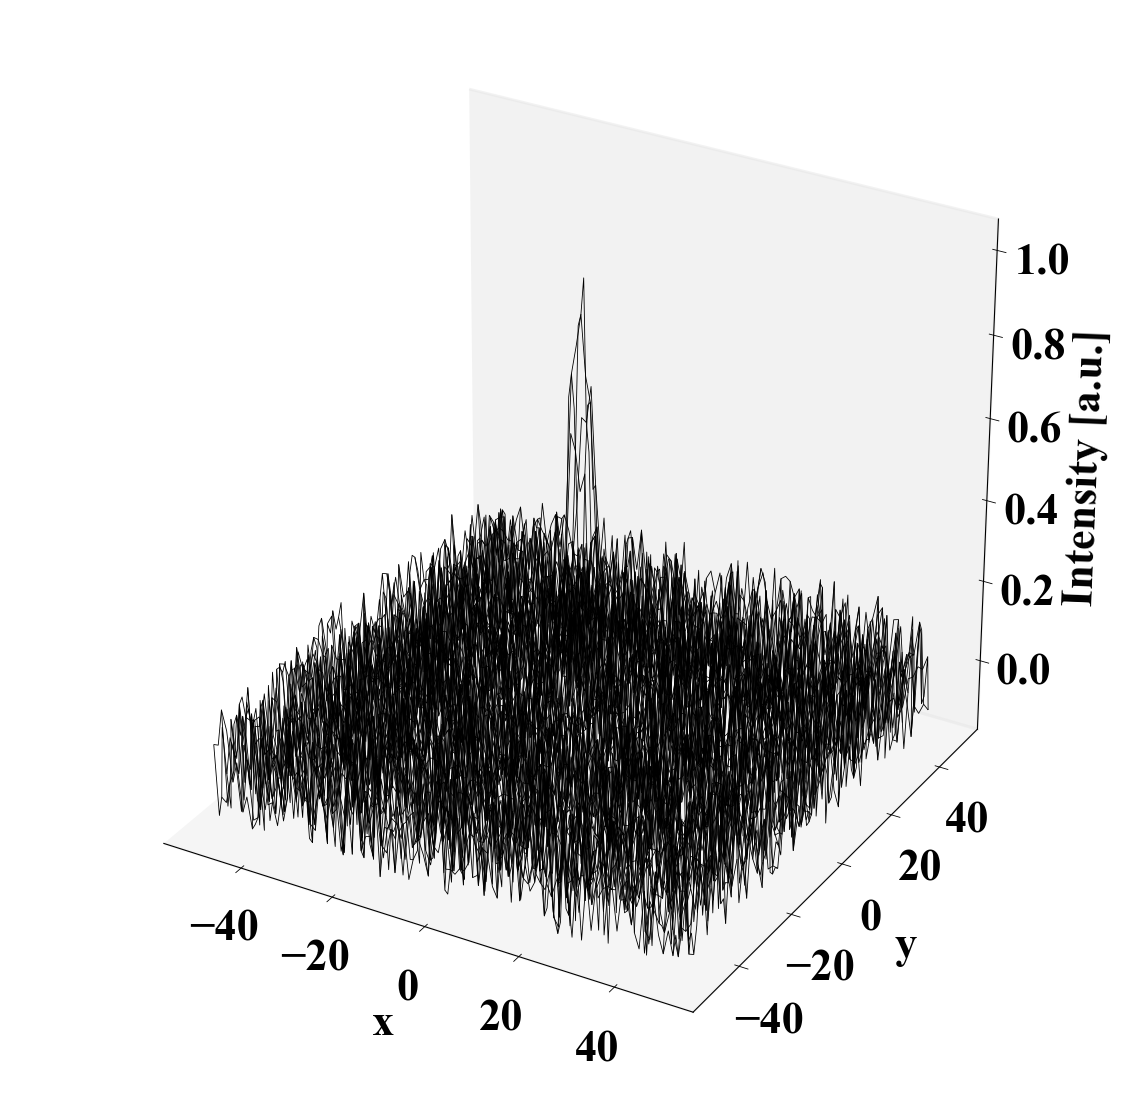

保存ファイル名： 2020-11-16_10-59_2d+noise30.svg
保存ファイルパス： /Users/nagaiyuma/Documents/myprogram/savefig30%/2020-11-16_10-59_2d+noise30.svg


In [36]:
dt_now = datetime.datetime.now()
print('現在時刻：', dt_now)
#ノイズ割合
NOISE = 30
#損失関数の推移
save_folder = os.path.join(dir_name, f'savefig{NOISE}%')
save_name = dt_now.strftime("%Y-%m-%d_%H-%M") +f'_2d+noise{NOISE}.svg'
save_file = os.path.join(save_folder, save_name) # 保存先のファイルパス作成

#ガウス分布の初期値
i0 = 1.0
x0 = 0.0
y0 = 0.0
w0 = 5.0
h0 = 0.0
center = data_size/2
x_array = np.arange(-center, center, 1.0)                         # x配列
y_array = np.arange(-center, center, 1.0)                         # y配列
x_grid, y_grid = np.meshgrid(x_array, y_array)
intensity = i0 * np.exp(-2*((x_grid-x0)**2 + (y_grid-y0)**2)/w0**2).T
nx = len(x_array)
ny = len(y_array)
noise = (np.random.rand(nx*ny)-0.5)*i0*NOISE*0.01   #プラスマイナスNOISE%のノイズ(一様分布), (np.random.rand(nx*ny)-0.5)*2の部分が-1から1までの乱数になる
noise = noise.reshape((nx,ny))
intensity_noise = intensity + noise

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("x", fontsize=16)
ax.set_ylabel("y", fontsize=16)
ax.set_zlabel("Intensity [a.u.]", fontsize=16)
plt.tick_params(labelsize=16)
ax.grid(False)
ax.plot_wireframe(x_grid, y_grid, intensity_noise, color='black', linewidth=0.3)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
fig.savefig(save_file, format="svg", bbox_inches="tight")
plt.show()
print('保存ファイル名：', save_name)
print('保存ファイルパス：', save_file)